In [30]:
from time import sleep
from threading import *

class Hello(Thread):
    def run(self):
        for i in range(5):
            print("Collect Raw Data --> to MongoDB")
            sleep(1)

class Hi(Thread):
    def run(self):
        for i in range(5):
            print("Aggregate raw data --> to MongoDB")
            sleep(1)
            
class Again(Thread):
    def run(self):
        for i in range(5):
            print("Update plots")
            sleep(1)

class CookieMonster(Thread):
    def run(self):
        for i in range(5):
            print("Save eventful timestamps --> to MongoDB\n")
            sleep(1)

t1 = Hello()
t2 = Hi()
t3 = Again()
t4 = CookieMonster()

t1.start()
sleep(0.2)
t2.start()
sleep(0.2)
t3.start()
sleep(0.2)
t4.start()

t4.join()

print("Bye")

Collect Raw Data --> to MongoDB
Aggregate raw data --> to MongoDB
Update plots
Save eventful timestamps --> to MongoDB

Collect Raw Data --> to MongoDB
Aggregate raw data --> to MongoDB
Update plots
Save eventful timestamps --> to MongoDB

Collect Raw Data --> to MongoDB
Aggregate raw data --> to MongoDB
Update plots
Save eventful timestamps --> to MongoDB

Collect Raw Data --> to MongoDB
Aggregate raw data --> to MongoDB
Update plots
Save eventful timestamps --> to MongoDB

Collect Raw Data --> to MongoDB
Aggregate raw data --> to MongoDB
Update plots
Save eventful timestamps --> to MongoDB

Bye


# Multithreading test complete.
# Now try animating plots.

In [4]:
%matplotlib inline

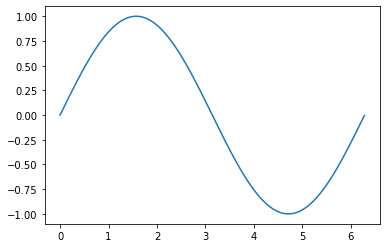

In [5]:
# https://matplotlib.org/stable/gallery/animation/simple_anim.html

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

# Attempt 2  at animated plots (js-based)

In [6]:
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/


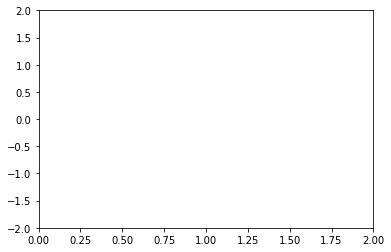

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [8]:
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)



In [9]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)



In [10]:
HTML(anim.to_html5_video())

In [11]:
HTML(anim.to_jshtml())

In [13]:
# Initialize the Animation object again
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

In [14]:
anim._repr_html_() is None

True

In [15]:
anim

In [16]:
rc('animation', html='jshtml')

In [17]:
anim

In [18]:
%matplotlib

Using matplotlib backend: TkAgg


# Attempt 3

In [2]:
# pip install ipympl

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: MarkupSafe>=2.0 in c:\users\waltp\appdata\local\pypoetry\cache\virtualenvs\bci-n7qz1uqi-py3.9\lib\site-packages (from jinja2->notebook>=4.4.1->widgetsnbextension~=3.5.0->ipywidgets>=7.6.0->ipympl) (2.0.1)



In [2]:
%matplotlib widget

In [3]:
%matplotlib

Using matplotlib backend: module://ipympl.backend_nbagg


In [4]:
# https://github.com/matplotlib/ipympl/blob/master/examples/ipympl.ipynb

import matplotlib.pyplot as plt
import numpy as np
# Testing matplotlib interactions with a simple plot
fig = plt.figure()
plt.plot(np.sin(np.linspace(0, 20, 100)));

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [5]:
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False # Hide the Figure name at the top of the figure

In [6]:
fig.canvas.footer_visible = False

In [7]:
fig.canvas.resizable = False

In [8]:

# If true then scrolling while the mouse is over the canvas will not move the entire notebook
fig.canvas.capture_scroll = True

In [9]:
fig.canvas.toolbar_visible = True
display(fig.canvas)

Canvas(capture_scroll=True, footer_visible=False, header_visible=False, resizable=False, toolbar=Toolbar(tooli…

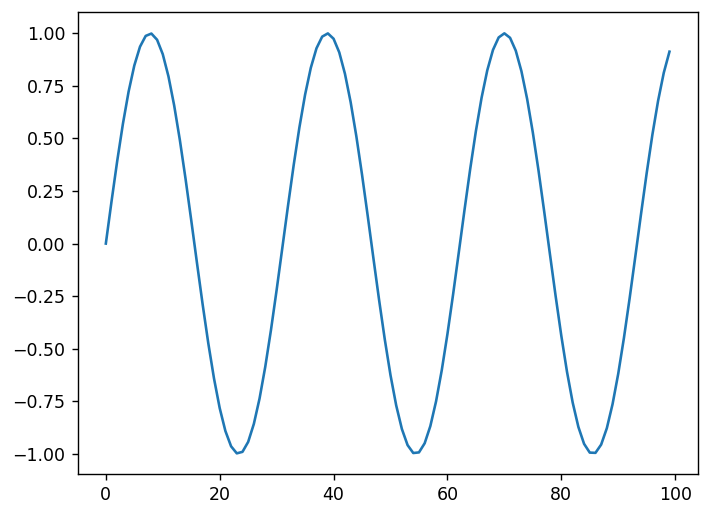

In [10]:
display(fig)

In [11]:

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Subplots

In [12]:
# A more complex example from the matplotlib gallery
np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
fig.canvas.toolbar_position = 'right'

In [14]:
fig.canvas.toolbar_visible = False

### Other (layouting, etc)

In [15]:
import ipywidgets as widgets

# ensure we are interactive mode 
# this is default but if this notebook is executed out of order it may have been turned off
plt.ion()


fig = plt.figure()
ax = fig.gca()
ax.imshow(Z)

widgets.AppLayout(
    center=fig.canvas,
    footer=widgets.Button(icon='check'),
    pane_heights=[0, 6, 1]
)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

AppLayout(children=(Button(icon='check', layout=Layout(grid_area='footer'), style=ButtonStyle()), Canvas(layou…

In [16]:
plt.ioff()
fig = plt.figure()
plt.ion()

ax = fig.gca()
ax.imshow(Z)

widgets.AppLayout(
    center=fig.canvas,
    footer=widgets.Button(icon='check'),
    pane_heights=[0, 6, 1]
)

AppLayout(children=(Button(icon='check', layout=Layout(grid_area='footer'), style=ButtonStyle()), Canvas(layou…

In [17]:
out = widgets.Output()
with out:
    fig = plt.figure()

ax = fig.gca()
ax.imshow(Z)

widgets.AppLayout(
    center=out,
    footer=widgets.Button(icon='check'),
    pane_heights=[0, 6, 1]
)

AppLayout(children=(Button(icon='check', layout=Layout(grid_area='footer'), style=ButtonStyle()), Output(layou…

In [3]:
# When using the `widget` backend from ipympl,
# fig.canvas is a proper Jupyter interactive widget, which can be embedded in
# an ipywidgets layout. See https://ipywidgets.readthedocs.io/en/stable/examples/Layout%20Templates.html

# One can bound figure attributes to other widget values.
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets

plt.ioff()

slider = ipywidgets.FloatSlider(
    orientation='horizontal',
    description='Factor:',
    value=1.0,
    min=0.02,
    max=2.0
)

slider.layout.margin = '0px 30% 0px 30%'
slider.layout.width = '40%'

fig = plt.figure()
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title('Plotting: y=sin({} * x)'.format(slider.value))

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(slider.value * x))

def update_lines(change):
    plt.title('Plotting: y=sin({} * x)'.format(change.new))
    lines[0].set_data(x, np.sin(change.new * x))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')
print('test')
ipywidgets.AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)



test


AppLayout(children=(FloatSlider(value=1.0, description='Factor:', layout=Layout(grid_area='footer', margin='0p…

In [ ]:
# Test real time updates

# When using the `widget` backend from ipympl,
# fig.canvas is a proper Jupyter interactive widget, which can be embedded in
# an ipywidgets layout. See https://ipywidgets.readthedocs.io/en/stable/examples/Layout%20Templates.html

# One can bound figure attributes to other widget values.
from ipywidgets import AppLayout, FloatSlider

plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='Factor:',
    value=1.0,
    min=0.02,
    max=2.0
)

slider.layout.margin = '0px 30% 0px 30%'
slider.layout.width = '40%'

fig = plt.figure()
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title('Plotting: y=sin({} * x)'.format(slider.value))

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(slider.value * x))

def update_lines(change):
    plt.title('Plotting: y=sin({} * x)'.format(change.new))
    lines[0].set_data(x, np.sin(change.new * x))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)

In [18]:

# precomputing all images
x = np.linspace(0,np.pi,200)
y = np.linspace(0,10,200)
X,Y = np.meshgrid(x,y)
parameter = np.linspace(-5,5)
example_image_stack = np.sin(X)[None,:,:]+np.exp(np.cos(Y[None,:,:]*parameter[:,None,None]))

In [19]:
plt.ioff()
fig = plt.figure()
plt.ion()
im = plt.imshow(example_image_stack[0])

def update(change):
    im.set_data(example_image_stack[change['new']])
    fig.canvas.draw_idle()
    
    
slider = widgets.IntSlider(value=0, min=0, max=len(parameter)-1)
slider.observe(update, names='value')
widgets.VBox([slider, fig.canvas])

In [21]:

plt.ioff()
fig = plt.figure()
plt.ion()
im = plt.imshow(example_image_stack[0])

out = widgets.Output()
@out.capture()
def update(change):
    with out:
        if change['name'] == 'value':
            im.set_data(example_image_stack[change['new']])
            fig.canvas.draw_idle
    
    
slider = widgets.IntSlider(value=0, min=0, max=len(parameter)+10)
slider.observe(update)
display(widgets.VBox([slider, fig.canvas]))
display(out)

Output()